# Assignments related to Statistics

In [26]:
import statistics as s
import scipy.stats as ss
import pandas as pd
import numpy as np

In [27]:
heights = [180,160,179,185,160,145,176,175,180,199]
weights = [90,80,76,88,77,88,96,56,59,67]

#### Find out mean and median of heights and weights

In [28]:
print(f"Mean Height = {s.mean(heights)}, Median Height = {s.median(heights)}")
print(f"Mean Weight = {s.mean(weights)}, Median Weight = {s.median(weights)}")

Mean Height = 173.9, Median Height = 177.5
Mean Weight = 77.7, Median Weight = 78.5


#### Find out mode in weights 

In [29]:
print(f"Mode in weights = {s.mode(weights)}")

Mode in weights = 88


#### What is the range for heights and weights

In [30]:
print(f"Range for heights = {max(heights) - min(heights)}")
print(f"Range for weights = {max(weights) - min(weights)}")

Range for heights = 54
Range for weights = 40


#### What is variance and standard deviation of heights and weights

In [31]:
print(f"Variance of heights = {s.variance(heights)}, Standard deviation of heights = {s.stdev(heights)}")
print(f"Variance of weights = {s.variance(weights)}, Standard deviation of weights = {s.stdev(weights)}")

Variance of heights = 231.2111111111111, Standard deviation of heights = 15.20562761319345
Variance of weights = 182.45555555555555, Standard deviation of weights = 13.507611023254835


#### Display IQR for heights

In [32]:
ss.iqr(heights)

16.25

#### Display outliers in heights. Consider adding a few new values, if necessary

In [33]:
heights_upd = [180,160,179,185,160,145,176,175,180,199,125,215]
q1 = np.quantile(heights_upd,0.25)
q3 = np.quantile(heights_upd,0.75)
iqr = q3 - q1

outliers = []

for n in heights_upd:
    if n < (q1-(1.5*iqr)) or n > (q3+(1.5*iqr)):
        outliers.append(n)

print(f"Number of outliers = {len(outliers)}, Outliers = {outliers}")

Number of outliers = 2, Outliers = [125, 215]


#### Display skewness of weights 

In [34]:
ss.skew(weights)

-0.370716544807603

#### Check whether there is any Kurtosis in heights

In [35]:
ss.kurtosis(heights)

-0.25691423931847623

#### Display coefficient and p-value of weights and heights 

In [36]:
ss.pearsonr(weights,heights)

(-0.2744349737525768, 0.4428803231273694)

#### Find slope and intercept for weight (y) using height (x)

In [37]:
height_reg = ss.linregress(heights, weights)
height_reg

LinregressResult(slope=-0.24378874525445718, intercept=120.0948627997501, rvalue=-0.2744349737525768, pvalue=0.4428803231273696, stderr=0.3020134001954503)

#### Display estimated weight for the following heights 180,190,200

In [38]:
heights_list = [180,190,200]
weights_list = []

for n in heights_list:
    weight = height_reg.intercept + height_reg.slope * n
    weights_list.append(weight)
    
print(heights_list, weights_list)

[180, 190, 200] [76.21288865394781, 73.77500120140324, 71.33711374885867]


<h3 style="color:red">Exercises related to House Data</h3>

In [39]:
sizes = [1000,2000,1500,1100,1670,1550,3000,2400,3400,1200]
ages =  [5,6,2,10,11,7,5,6,8,1]
prices = [15.5,25.5,22,10.5,30,35,45,25,43,22]

#### Calculate skewness in house prices

In [40]:
ss.skew(prices)

0.2577054368611705

#### Calculate variance in house sizes 

In [41]:
s.variance(sizes)

665795.5555555555

#### Display correlation and p-value between size and price

In [42]:
ss.pearsonr(sizes,prices)

(0.83618504618361, 0.0025725398031045785)

#### Display mode for age

In [43]:
ss.mode(ages)

ModeResult(mode=array([5]), count=array([2]))

#### Calculate slope and intercept for size and price so that we can calculate price for given size

In [44]:
size_reg = ss.linregress(sizes,prices)
size_reg

LinregressResult(slope=0.011393721128941818, intercept=5.9070168353315005, rvalue=0.83618504618361, pvalue=0.002572539803104576, stderr=0.002642123965417807)

#### Use slope and intercept calculated above to predict price of houses with sizes : 1500,1550,1600,1850

In [45]:
sizes_list = [1500,1550,1600,1850]
prices_list = []

for n in sizes_list:
    price = size_reg.intercept + size_reg.slope * n
    prices_list.append(price)
    
print(sizes_list, prices_list)

[1500, 1550, 1600, 1850] [22.997598528744227, 23.56728458519132, 24.13697064163841, 26.985400923873865]


#### Based on age and size of the house find price. Use multi-variable regression to calculate price.

In [46]:
size_reg = ss.linregress(sizes, prices)
size_reg

LinregressResult(slope=0.011393721128941818, intercept=5.9070168353315005, rvalue=0.83618504618361, pvalue=0.002572539803104576, stderr=0.002642123965417807)

In [47]:
age_reg = ss.linregress(ages, prices)
age_reg

LinregressResult(slope=0.3053993250843644, intercept=25.48706411698538, rvalue=0.08633046178089812, pvalue=0.8125533057129929, stderr=1.246047411291669)

In [48]:
size_avg = s.mean(sizes)
age_avg =  s.mean(ages)
price_avg = s.mean(prices)

In [49]:
# Calculate intercept for multiple variables 
intercept = price_avg - size_reg.slope * size_avg  - age_reg.slope * age_avg

In [50]:
# Calculate price based on both size and age
for (size,age, price) in zip(sizes,ages,prices):
    p_price = intercept + size * size_reg.slope +  age * age_reg.slope
    # find out the difference between predicted and actual 
    diff = p_price - price
    print(f"{size:5} {age:5} {p_price:8.2f} {price:8.2f} {diff:8.2f}")

 1000     5    16.96    15.50     1.46
 2000     6    28.66    25.50     3.16
 1500     2    21.75    22.00    -0.25
 1100    10    19.63    10.50     9.13
 1670    11    26.43    30.00    -3.57
 1550     7    23.84    35.00   -11.16
 3000     5    39.75    45.00    -5.25
 2400     6    33.22    25.00     8.22
 3400     8    45.23    43.00     2.23
 1200     1    18.02    22.00    -3.98


## Draw plots to visualize data 

Copy data into a data frame so that plots can be drawn using plot() method of Series (one column) 
or DataFrame(multiple columns) data structures.

We can create a dataframe from multiple lists as follows:
    
`df = pd.DataFrame( {'weight' : weights, 'height' : heights})`

Once dataframe is created we can draw plots using one or more of its columns

In [51]:
df = pd.DataFrame( {'weight' : weights, 'height' : heights})

#### Plot a histogram for weights 

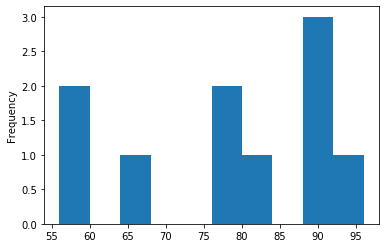

In [52]:
df['weight'].plot.hist()

#### Display a scatter plot for weights and heights 

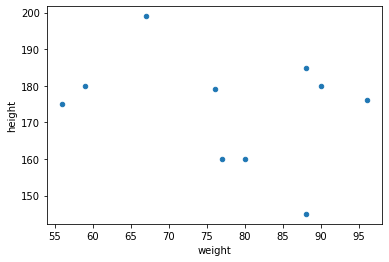

In [53]:
df.plot.scatter(x='weight',y='height')

#### Display box plot for heights with mean line 

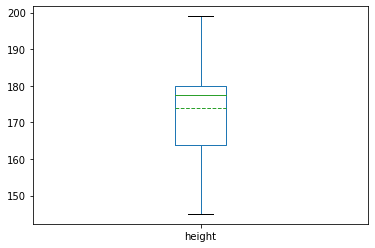

In [54]:
df['height'].plot.box(showmeans=True,meanline=True)